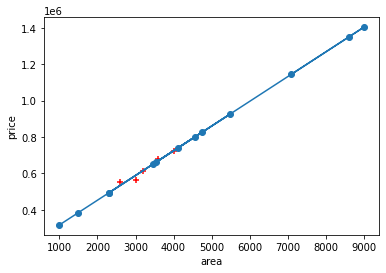

In [ ]:
#Linear Regression With One Variable
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv")
# plt.xlabel('area')
# plt.ylabel('price')
plt.scatter(df.area, df.price,color = 'red',marker = '+')
x_df = df.drop('price',axis = 'columns')
x_df
y_df = df.drop('area',axis = 'columns')
regression = linear_model.LinearRegression()
regression.fit(x_df,y_df)
f = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv')
m= regression.predict(f)
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(f.area,m)
plt.plot(f.area,m)

In [ ]:
#Linear Regression With One Variable (exercise)
import pandas as pd
import matplotlib.pyplot as plot
from sklearn import linear_model
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')
df =df.rename(columns = {'per capita income (US$)':'income'})
plt.xlabel('year')
plt.ylabel('income')
x_df = df.drop('income',axis = 'columns')
y_df = df.drop('year', axis = 'columns')
plt.scatter(df.year,df.income,color ='red',marker = '+')
plt.plot(df.year,df.income)
regression = linear_model.LinearRegression()
regression.fit(x_df,y_df)
regression.predict([['2020']])



In [ ]:
#Linear Regression Multiple Variables
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv')
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
regression = linear_model.LinearRegression()
regression.fit(df.drop('price',axis ='columns'),df.price)
regression.predict([[3000, 3, 40]])


In [ ]:
#Linear Regression Multiple Variables (exercise)
import pandas as pd
!pip install word2number
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from word2number import w2n
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
df.rename(columns={'test_score(out of 10)':'test','interview_score(out of 10)':'interview','salary($)' : 'salary'},inplace = True)
df.test.fillna(df.test.mean(),inplace = True)
df.experience.fillna("zero",inplace = True)
#df.experience = df.experience.apply(w2n.word_to_num)
df.experience = df.experience.apply(w2n.word_to_num)
regression = linear_model.LinearRegression()
regression.fit(df.drop('salary',axis = 'columns'),df.salary)
regression.predict([[2,9,6]])

Dummy Variable Trap

When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that yo`u are using is not handling this for you`

In [ ]:
#Categorical Variables 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/homeprices.csv')
dummies = pd.get_dummies(df.town)
df = pd.concat([df,dummies], axis = 'columns')
final = df.drop(['town'], axis = 'columns')
final = final.drop('west windsor', axis = 'columns')
regression = linear_model.LinearRegression()
regression.fit(final.drop('price',axis='columns'),final.price)
regression.score(final.drop('price',axis='columns'),final.price)
regression.predict([[3400,0,0]])

#One Hot Encoding




In [ ]:
#Categorical Variables 
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv')
dummies = pd.get_dummies(df['Car Model'])
final = pd.concat([df,dummies],axis = 'columns')
final = final.drop(['Car Model','Mercedez Benz C class'], axis = 'columns')
from sklearn import linear_model
regression = linear_model.LinearRegression()
regression.fit(final.drop('Sell Price($)',axis = 'columns'),final['Sell Price($)'])
regression.score(final.drop('Sell Price($)',axis = 'columns'),final['Sell Price($)'])
#regression.predict([[45000,4,0,0]])


0.9417050937281083

In [ ]:
# Training And Testing Available Data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/6_train_test_split/carprices.csv')

# plt.xlabel('Mileage')
# plt.ylabel('price')
df.rename(columns = {'Sell Price($)':'price'},inplace = 'True')
#df =df.rename(columns = {'per capita income (US$)':'income'})
#plt.scatter(df['Age(yrs)'],df.price)

#plt.scatter(df.year,df.income,color ='red',marker = '+')
df.head()
x = df.drop('price',axis = 'columns')
y =df.price
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.9)
regression = linear_model.LinearRegression()
regression.fit(x_train,y_train)
regression.predict(x_test)
regression.score(x_test,y_test)
#train_test_split

0.6411573632698375

In [ ]:
# logistic regression binary classification
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv')
df.head()
# plt.xlabel('age')
# plt.ylabel('insurance')
# plt.scatter(df.age,df.bought_insurance)
x = df.drop('bought_insurance',axis = 'columns')
x_train,x_test,y_train,y_test = train_test_split(x,df.bought_insurance,test_size = 0.2)
regression = LogisticRegression()
regression.fit(x_train,y_train)
regression.predict(x_test)
regression.score(x_test,y_test)


0.8333333333333334

In [ ]:
# logistic regression binary classification exercise
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')
df.head()
# plt.xlabel('satisafction')
# plt.ylabel('left')
# plt.scatter(df['satisfaction_level'],df.average_montly_hours)
# employees left from the company
left = df[df.left==1]
retention = df[df.left ==0]
k = df.groupby('left').mean()
#pd.crosstab(df.time_spend_company,df.left).plot(kind='bar')
df.head()
sub = df[['satisfaction_level','last_evaluation','time_spend_company','promotion_last_5years','salary']]
sub.head()
s = pd.get_dummies(sub.salary,prefix= 'salary')
sub = pd.concat([sub,s], axis = 'columns')
sub.head()
sub =sub.drop('salary',axis = 'columns')
x_train,x_test,y_train,y_test = train_test_split(sub,df.left,test_size = 0.2)
regression = LogisticRegression()

regression.fit(x_train,y_train)
regression.predict(x_test)
regression.score(x_test,y_test)


#pd.crosstab(df.salary,df.last_evaluation).plot(kind='density')

0.7613333333333333

In [ ]:
#  logistic regression multi class classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
df = load_digits()
#dir(df)
#plt.matshow(df.images[0])
x_train, x_test, y_train, y_test = train_test_split(df.data,df.target,test_size = 0.3)
regression = LogisticRegression()
regression.fit(x_train,y_train)
predicted = regression.predict(x_test)
regression.score(x_test,y_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
cm
import seaborn as sn
plt.figure(figsize = (10,7))

sn.heatmap(cm,annot = True)
plt.xlabel('predict')
plt.ylabel('True')


In [ ]:
# logistic regression multi class classification exercise
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
df = load_iris()
x_train, x_test, y_train, y_test = train_test_split(df.data,df.target,test_size = 0.3)
regression = LogisticRegression()
regression.fit(x_train,y_train)
predicted = regression.predict(x_test)
regression.score(x_test,y_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
cm
# confusion matrix helps us where did our model made wrong predictions 
# import seaborn as sn
# plt.figure(figsize = (10,7))

# sn.heatmap(cm,annot = True)
# plt.xlabel('predict')
# plt.ylabel('True')


array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  0, 14]])

In [ ]:
#Decision Trees classsifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/salaries.csv')

# plt.scatter(df.company,df.salary_more_then_100k)
# plt.plot(df.company,df.salary_more_then_100k)
df = df.rename(columns={'salary_more_then_100k' : 'salary'})
df.head()
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()
df['n_company'] = le_company.fit_transform(df.company)
df['n_job'] = le_job.fit_transform(df.job)
df['degree'] = le_degree.fit_transform(df.degree)

df = df.drop(['company','job','degree'],axis = 'columns')
input = df.drop('salary',axis = 'columns')


#x_train,x_test,y_train,y_test = train_test_split(input,df.salary,test_size= 0.3)
#model.fit(x_train,y_train)
#model.predict(x_test)
#model.score(x_test,y_test)
model = tree.DecisionTreeClassifier()


model.fit(input,df.salary)

model.score(input,df.salary)




,salary,n_company,n_job
0,0,2,2
1,0,2,2
2,1,2,0
3,1,2,0
4,0,2,1
5,1,2,1
6,0,0,2
7,0,0,1
8,0,0,0
9,1,0,0


In [ ]:
#Decision Trees classsifier exercise
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')
df.head()
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
inputs = df.drop('Survived',axis='columns')
target = df.Survived
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.8212290502793296

0.9333333333333333

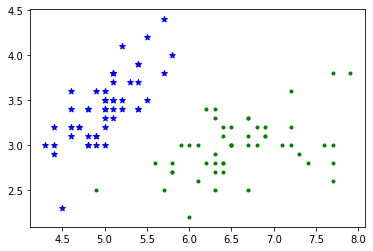

In [ ]:
#svm 
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
df = load_iris()
df.data
df.feature_names
data = pd.DataFrame(df.data,columns=df.feature_names)
data['target'] = df.target
data[data.target==1].head()
data['flowernames'] = data.target.apply(lambda x: df.target_names[x])
x = data.drop(['target','flowernames'],axis = 'columns')
df0 = x[:50]
df1 = x[50:100]
df2 = x[100:150]
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'blue',marker = '*')
#plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'red',marker = '+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'green',marker = '.')
from sklearn.model_selection import train_test_split
y = data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
from sklearn.svm import SVC
model = SVC(kernel='linear')#kernal,gamma,regularization
model.fit(x_train,y_train)
model.score(x_test,y_test)


In [ ]:
#svm example
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

df = load_digits()

#plt.matshow(df.images[0])
dir(df)
data = pd.DataFrame(df.data)
data.head()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,df.target,test_size=0.20)
from sklearn.svm import SVC
model = SVC(kernel = 'rbf',C = 1)
model.fit(x_train,y_train)
model.score(x_test,y_test)












0.9916666666666667

In [ ]:
#random forest trees
import pandas as pd
from sklearn.datasets import load_digits,load_iris
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
#df = load_digits()
df = load_iris()

dir(df)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.data,df.target,test_size = 0.2)
dir(df)
# model = RandomForestClassifier(n_estimators=1)
# model.fit(x_train, y_train)
# model.score(x_test,y_test)
# plt.imshow(df.data[0][0])



['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
#k fold cross validation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits,load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
digits = load_digits()
# x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size = 0.2)


#logistic regression
lo = LogisticRegression( solver='liblinear',multi_class='ovr',max_iter=100)
# log.fit(x_train,y_train)
# log.score(x_test,y_test)
# #RandomForestClassifier
# rf = RandomForestClassifier()
# rf.fit(x_train,y_train)
# rf.score(x_test,y_test)
# #svm
# s = SVC()
# s.fit(x_train,y_train)
# s.score(x_test,y_test)

#k fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf
# for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
#   print(train_index,test_index)
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
score_lr=[]
for i,j in skf.split(digits.data,digits.target):
  x_train,x_test,y_train,y_test = digits.data[i],digits.data[j],digits.target[i],digits.target[j]
  lo.fit(x_train,y_train)
  score_lr.append(lo.score(x_test,y_test))


score_svc=[]
score_rf=[]
print(score_lr)

#score_lr.append()
#np.average(score_lr)
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression( solver='liblinear',multi_class='ovr',max_iter=100),digits.data,digits.target,cv=3)
iris = load_iris()
dir(iris)
cross_val_score(LogisticRegression( solver='liblinear',multi_class='ovr',max_iter=100),iris.data,iris.target,cv=3)

  




 

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]


array([0.96, 0.96, 0.94])

In [ ]:
# naive bayes example Guassian Naive Bayes
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv')
df.head()
df.drop(['PassengerId','Name','Ticket','Cabin'],inplace = True,axis = 'columns')
k = pd.get_dummies(df.Sex)
m= pd.get_dummies(df.Embarked)
k.head()
y = df.Survived
df = pd.concat([df,k,m],axis = 'columns')
df.drop(['Sex','Embarked','male','C','Survived'],axis = 'columns',inplace = True)
df.Age =df.Age.fillna(df.Age.mean())

from sklearn.model_selection import train_test_split
# to check any columns having null values
#df.columns[df.isna().any()] 
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
x_train.columns[x_train.isna().any()]
x_train.isna().sum()
model.fit(x_train,y_train)
model.score(x_test,y_test)
from sklearn.model_selection import cross_val_score
l=[]
cross_val_score(GaussianNB(),df,y)
l.append(cross_val_score(GaussianNB(),df,y))
import numpy as np
np.average(l)





Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
female    0
Q         0
S         0
dtype: int64

59 71 48


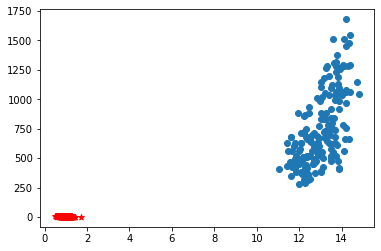

In [ ]:
#Multi Nomial Naive Bayes calssification
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv')
df['spam'] = df.Category.apply(lambda x:1 if x== 'spam' else 0)
df.head()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
v = CountVectorizer()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.Message,df.spam,test_size=0.25)
from sklearn.pipeline import Pipeline
pip = Pipeline([('v', CountVectorizer()),('nb', MultinomialNB())])
# clf = Pipeline([('v', CountVectorizer()),('nb', MultinomialNB())])
pip.fit(x_train,y_train)
pip.score(x_test,y_test)
















59 71 48


0.7555555555555555

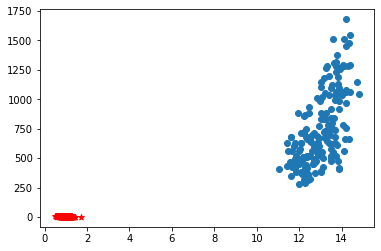

In [ ]:
# multinomial naive bayes
from sklearn.datasets import load_wine
w = load_wine()
o = pd.DataFrame(w.data,columns = w.feature_names)
o['target'] = w.target
count=count1=count2 = 0
for i in o.target:
  if i==1:
    count1 +=1
  elif i==0:
    count2 +=1
  else:
    count +=1
print(count2,count1,count)
#inputs.columns[inputs.isna().any()]
o.columns[o.isna().sum()]
import matplotlib.pyplot as plt
plt.scatter(o.alcohol,o.proline)
plt.scatter(o.hue,o.color_intensity,marker= '*',color = 'red')
x_train,x_test,y_train,y_test = train_test_split(w.data,w.target,test_size=0.25)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)
nb.score(x_test,y_test)

In [ ]:
#hyper parameter tuning
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['flower'] = iris.target
df['name'] = df.flower.apply(lambda x: iris.target_names[x])
df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
from sklearn import svm
model = svm.SVC(kernel = 'rbf',gamma = 'auto', C=10)
model.fit(X_train,y_train)
model.score(X_test,y_test)
from sklearn.model_selection import cross_val_score
import numpy as np
np.average(cross_val_score(svm.SVC(kernel = 'rbf',gamma = 'auto', C=10),iris.data, iris.target,cv=5))
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(svm.SVC(gamma='auto'),{'C':[1,5,10],'kernel':['rbf','linear']},cv=5,return_train_score=False)
gscv.fit(X_train,y_train)
dir(gscv)
p = pd.DataFrame(gscv.cv_results_)
#p
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'),{'C': [1,10,20],'kernel': ['rbf','linear']},cv=5,return_train_score=False)
#rs.fit(X_train,y_train)
rs.fit(iris.data,iris.target)
dir(gscv)
i = pd.DataFrame(rs.cv_results_)
i
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


In [ ]:
# L1(Lasso) and L2(ridge) Regularization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/16_regularization/Melbourne_housing_FULL.csv')
# df.head()
# df.isna().sum()
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
df = df[cols_to_use]
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())
df.dropna(inplace = True)
#df.isnull().sum()
df = pd.get_dummies(df,drop_first = True)
X = df.drop('Price',axis=1)
y = df['Price']
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

reg.score(test_X, test_y)
reg.score(train_X, train_y)
from sklearn.linear_model import Lasso
k =Lasso(alpha=50, max_iter=100, tol=0.1)
k.fit(train_X, train_y)
k.score(test_X, test_y)
k.score(train_X, train_y)
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)
ridge_reg.score(test_X, test_y)
ridge_reg.score(train_X, train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.6670848945194958

1.0

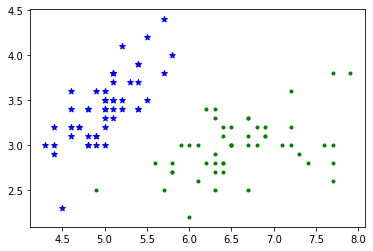

In [ ]:
# knn
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
df = load_iris()
df.data
df.feature_names
data = pd.DataFrame(df.data,columns=df.feature_names)
data['target'] = df.target
data[data.target==1].head()
data['flowernames'] = data.target.apply(lambda x: df.target_names[x])
x = data.drop(['target','flowernames'],axis = 'columns')
df0 = x[:50]
df1 = x[50:100]
df2 = x[100:150]
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'blue',marker = '*')
#plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'red',marker = '+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'green',marker = '.')
from sklearn.model_selection import train_test_split
y = data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#knn exercise
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
df = load_digits()
from sklearn.model_selection import train_test_split
y = df.target

x_train,x_test,y_train,y_test = train_test_split(df.data,y,test_size = 0.2)
from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(KNeighborsClassifier(n_neighbors=5),{'n_neighbors':[4,8,12]},cv=5,return_train_score=False)
gscv.fit(x_train,y_train)
gscv.score(x_test, y_test)
dir(gscv)
gscv.best_estimator_
p = pd.DataFrame(gscv.cv_results_)
p
y_pred = knn.predict(x_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
# knn.fit(x_train, y_train)
# knn.score(x_test, y_test)
# from sklearn.metrics import confusion_matrix
# y_pred = knn.predict(x_test)
# cm = confusion_matrix(y_test, y_pred)
# cm
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sn
# plt.figure(figsize=(7,5))
# sn.heatmap(cm, annot=True)
# plt.xlabel('Predicted')
# plt.ylabel('Truth')



Text(0.5, 1.0, 'Age vs Income')

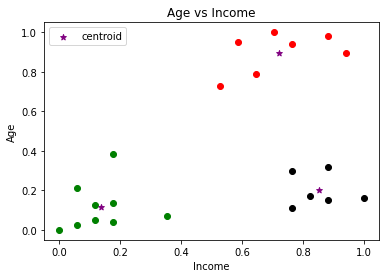

In [ ]:
#k means clustering
import pandas as pd
from sklearn.cluster import KMeans
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv')
df.head()
import matplotlib.pyplot as plt
#plt.scatter(df['Income($)'],df.Age)
# model = KMeans(n_clusters = 3)
# y_predicted = model.fit_predict(df[['Age','Income($)']])
# y_predicted
# df['cluster'] = y_predicted
# m = model.cluster_centers_
# df1 = df[df.cluster==0]
# df2 = df[df.cluster==1]
# df3 = df[df.cluster==2]

# plt.scatter(df1.Age,df1['Income($)'],color='green')
# plt.scatter(df2.Age,df2['Income($)'],color='red')
# plt.scatter(df3.Age,df3['Income($)'],color='black')
# plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
# plt.legend()
# plt.ylabel('Age')
# plt.xlabel('Income')
# plt.title('Age vs Income')

#preprocessing using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()
model = KMeans(n_clusters = 3)
y_predicted = model.fit_predict(df[['Age','Income($)']])
y_predicted
df['cluster'] = y_predicted
m = model.cluster_centers_
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.ylabel('Age')
plt.xlabel('Income')
plt.title('Age vs Income')
# sse = []
# k_rng = range(1,10)
# for k in k_rng:
#     km = KMeans(n_clusters=k)
#     km.fit(df[['Age','Income($)']])
#     sse.append(km.inertia_)
# plt.xlabel('K')
# plt.ylabel('Sum of squared error')
# plt.plot(k_rng,sse)





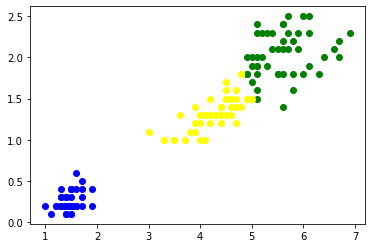

In [ ]:
#k means exercise
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()
df['flower'] = iris.target
df.head()
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp
df['cluster'] = yp
df.head(2)
df.cluster.unique()
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
# plt.xlabel('K')
# plt.ylabel('Sum of squared error')
# plt.plot(k_rng,sse)


In [ ]:
# pca
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()
dir(digits)
digits.data.shape
import matplotlib.pyplot as plt
plt.gray()
# plt.matshow(digits.data[0])
# digits.keys()
#plt.matshow(digits.data[0].reshape(8,8))
df = pd.DataFrame(digits.data,columns = digits.feature_names)
x = df
y = digits.target
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=30)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# now using pca
from sklearn.decomposition import PCA
pca = PCA(0.95)# retain 95% useful features or information or variation and create new dimensions
x_pca = pca.fit_transform(x)
x_pca
dir(pca)
pca.explained_variance_ratio_ # this gives us the ratio of variance
pca.n_components_ # this gives us number of pca components which means number of features taken
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

# try 2 components of pca which is 2 features which we will get low accuracy score
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
X_pca.shape
X_pca
pca.explained_variance_ratio_ # You can see that both combined retains 0.14+0.13=0.27 or 27% of important feature information
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

#We get less accuancy (~60%) as using only 2 components did not retain much of the feature information. 
#However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6083333333333333

<Figure size 432x288 with 0 Axes>

In [ ]:
#pca exercise
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/18_PCA/Exercise/heart.csv')
df.describe()
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(df[['Income($)']])
# df['Income($)'] = scaler.transform(df[['Income($)']])

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
df = pd.get_dummies(df,drop_first = True)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
x = df.drop('HeartDisease',axis = 'columns')
y = df.HeartDisease
scores=[]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
# model = [SVC,RandomForestClassifier,LogisticRegression]
# l = SVC()
# rf = RandomForestClassifier()
# lr =LogisticRegression()

# l.fit(x_train,y_train)
# scores.append(l.score(x_test,y_test))
# rf.fit(x_train,y_train)
# scores.append(rf.score(x_test,y_test))

# lr.fit(x_train,y_train)
# scores.append(lr.score(x_test,y_test))

scores

from sklearn.model_selection import cross_val_score
import numpy as np

np.average(cross_val_score(SVC(),x_train,y_train))


0.717938682322244

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


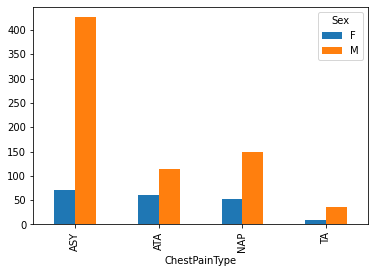

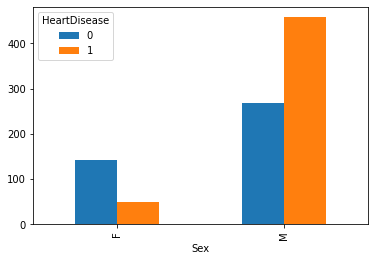

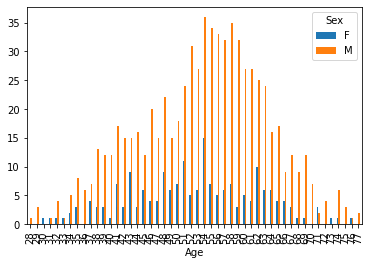